In [ ]:
!pip install yellowbrick

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid

import numpy as np

from yellowbrick.regressor import PredictionError, ResidualsPlot

import warnings
warnings.filterwarnings("ignore")

In [ ]:
st = pd.read_csv('fm_ST.csv', index_col=[0])
m = pd.read_csv('fm_M.csv', index_col=[0])
d = pd.read_csv('fm_D.csv', index_col=[0])
GK = pd.read_csv('fm_GK.csv', index_col=[0])

In [ ]:
# Predict value.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, m_value, test_size=0.2, random_state=42)

In [ ]:
reg = LassoCV(cv=10, random_state=42).fit(X_train, y_train)
reg.score(X_train, y_train)

0.6533140487132045

In [ ]:
reg.score(X_test, y_test)

0.6581025408294573

In [ ]:
reg.predict(X_test)

array([ 8.95181119,  9.97801445,  8.19793783, ..., 13.06179145,
       11.20706242,  9.79268833])

In [ ]:
importance = np.absolute(reg.coef_)
importance

array([0.00000000e+00, 6.82631444e-02, 2.20070907e+00, 1.48908330e+01,
       1.21811732e+00, 3.57258997e-01, 7.67491624e-02, 0.00000000e+00,
       3.46125347e-01, 0.00000000e+00, 2.26346759e-01, 6.84789338e-01,
       4.36939646e-01, 2.81210559e-02, 0.00000000e+00, 3.93054163e-02,
       3.11997388e-01, 3.95021081e-01, 6.31816960e-02, 2.63868457e-02,
       1.38571169e-01, 2.26226974e-01, 2.72932905e-01, 1.16305990e-02,
       8.52333024e-02, 2.80254348e-02, 7.10711150e-02, 1.90042913e-01,
       1.58723920e-01, 0.00000000e+00, 2.22776949e-01, 1.66138606e-01,
       3.24704199e-01, 4.11448597e-01, 5.74685755e-03, 9.21213226e-02,
       9.59991923e-02, 1.11874770e-01, 7.07882153e-02, 2.04910819e-01,
       8.88717539e-02, 1.16598215e-01, 0.00000000e+00, 2.37290462e-02,
       1.10945353e-01, 8.28614303e-02, 4.11503875e-02, 5.02702310e-01,
       6.69263000e-02, 0.00000000e+00, 4.38014686e-01, 9.95724633e-01,
       0.00000000e+00, 0.00000000e+00, 1.50173790e-03, 4.61686046e-02,
      

In [ ]:
np.array(X.columns)[importance > 0]

array(['Weight', 'Age', 'CA', 'PA', 'Wor', 'Vis', 'Tec', 'Tck', 'Str',
       'Sta', 'TRO', 'Pun', 'Pen', 'Pas', 'Pac', '1v1', 'OtB', 'Nat',
       'Mar', 'L Th', 'Lon', 'Ldr', 'Kic', 'Jum', 'Hea', 'Fre', 'Fla',
       'Fir', 'Fin', 'Ecc', 'Dri', 'Det', 'Dec', 'Cro', 'Cor', 'Cnt',
       'Cmp', 'Cmd', 'Bra', 'Bal', 'Ant', 'Agi', 'Agg', 'Acc', 'Top5div',
       'Preferred Foot_Left', 'Preferred Foot_Left Only',
       'Preferred Foot_Right', 'Best Role_A', 'Best Role_AM',
       'Best Role_BBM', 'Best Role_BWM', 'Best Role_CAR', 'Best Role_CM',
       'Best Role_DLP', 'Best Role_DM', 'Best Role_DW', 'Best Role_EG',
       'Best Role_HB', 'Best Role_IF', 'Best Role_IW', 'Best Role_MEZ',
       'Best Role_SS', 'Best Role_T', 'Best Role_Unknown', 'Best Role_W',
       'Best Role_WTM'], dtype=object)

In [ ]:
def run_Lasso_value(m):
  m = m.merge(pd.get_dummies(m,columns=['Best Role']))
  m.drop(columns=['Best Role', 'Pos'], inplace=True)
  m = m[(m['Value'] != 0) & (m['Wage'] != 0) & (m['Top5div'] == 1)]
  m_value = m['Value']
  X = m.drop(columns=['Value', 'Wage', 'Name','Top5div'])
  m_value = np.log(m_value+1)
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_scaled, m_value, test_size=0.2, random_state=42)

  reg = LassoCV(cv=10, random_state=42).fit(X_train, y_train)
  reg.score(X_train, y_train)
  importance = np.absolute(reg.coef_)
  return [reg, np.array(X.columns)[importance > 0]]

In [ ]:
def train_test(m):
  m = m.merge(pd.get_dummies(m,columns=['Best Role']))
  m.drop(columns=['Best Role', 'Pos'], inplace=True)
  m = m[(m['Value'] != 0) & (m['Wage'] != 0) & (m['Top5div'] == 1)]
  m_value = m['Value']
  X = m.drop(columns=['Value', 'Wage', 'Name','Top5div'])
  m_value = np.log(m_value+1)
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_scaled, m_value, test_size=0.2, random_state=42)

  return X_train, X_test, y_train, y_test

In [ ]:
# Run LASSO on four datasets.
result_m = run_Lasso_value(m)
result_st = run_Lasso_value(st)
result_gk = run_Lasso_value(GK)
result_d = run_Lasso_value(d)

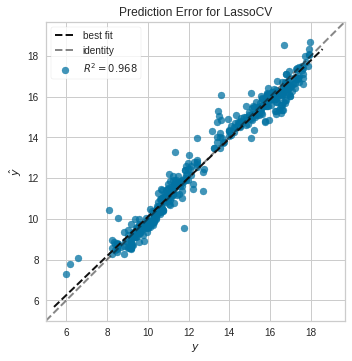

In [ ]:
# Visualize fit for midfielders.
model_m = result_m[0]
X_train, X_test, y_train, y_test = train_test(m)
visualizer = PredictionError(model_m)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

In [ ]:
# Print important features.
print(result_m[1])

['Height' 'Age' 'CA' 'PA' 'Wor' 'Tec' 'Tea' 'Tck' 'Str' 'Sta' 'TRO' 'Ref'
 'Pun' 'Pas' 'Pac' '1v1' 'OtB' 'Mar' 'L Th' 'Lon' 'Ldr' 'Kic' 'Jum' 'Hea'
 'Han' 'Fre' 'Fla' 'Fir' 'Ecc' 'Dri' 'Det' 'Dec' 'Cor' 'Cnt' 'Cmp' 'Com'
 'Cmd' 'Bal' 'Ant' 'Agg' 'Aer' 'Acc' 'Top15club' 'Preferred Foot_Either'
 'Preferred Foot_Left Only' 'Preferred Foot_Right'
 'Preferred Foot_Right Only' 'Best Role_A' 'Best Role_BBM' 'Best Role_BWM'
 'Best Role_CAR' 'Best Role_CM' 'Best Role_DLP' 'Best Role_DM'
 'Best Role_DW' 'Best Role_IF' 'Best Role_IW' 'Best Role_MEZ'
 'Best Role_VOL' 'Best Role_W']


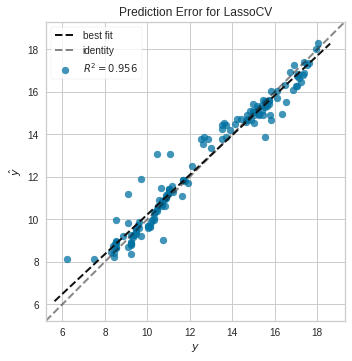

In [ ]:
# Visualize fit for strikers.
model_st = result_st[0]
X_train, X_test, y_train, y_test = train_test(st)
visualizer = PredictionError(model_st)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

In [ ]:
print(result_st[1])

['Age' 'CA' 'Str' 'Sta' 'TRO' 'Ref' 'Pun' 'Pac' '1v1' 'Ldr' 'Jum' 'Han'
 'Cor' 'Cnt' 'Com' 'Bra' 'Bal' 'Aer' 'Acc' 'Top15club'
 'Preferred Foot_Either' 'Preferred Foot_Right Only' 'Best Role_AF'
 'Best Role_DLF' 'Best Role_PF' 'Best Role_TM']


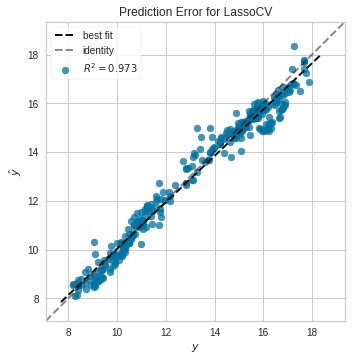

In [ ]:
# Visualize fit for Defenders.
model_d = result_d[0]
X_train, X_test, y_train, y_test = train_test(d)
visualizer = PredictionError(model_d)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

In [ ]:
# Print important features.
print(result_d[1])

['Height' 'Age' 'CA' 'PA' 'Wor' 'Vis' 'Thr' 'Tea' 'Str' 'Sta' 'Ref' 'Pun'
 'Pac' '1v1' 'OtB' 'Lon' 'Kic' 'Han' 'Fla' 'Fin' 'Dri' 'Cro' 'Cor' 'Bal'
 'Agi' 'Agg' 'Aer' 'Acc' 'Preferred Foot_Right'
 'Preferred Foot_Right Only' 'Best Role_BPD' 'Best Role_NCB'
 'Best Role_NFB']


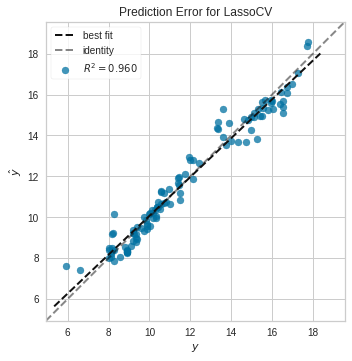

In [ ]:
# Visualize fit for Defenders.
model_gk = result_gk[0]
X_train, X_test, y_train, y_test = train_test(GK)
visualizer = PredictionError(model_gk)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

In [ ]:
print(result_gk[1])

['Height' 'Age' 'CA' 'Vis' 'Tec' 'Sta' 'TRO' 'OtB' 'Kic' 'Han' 'Fre' 'Fla'
 'Fir' 'Dri' 'Agi' 'Agg' 'Acc' 'Top15club' 'Preferred Foot_Left'
 'Preferred Foot_Left Only' 'Preferred Foot_Right'
 'Preferred Foot_Right Only' 'Best Role_G' 'Best Role_SK']


In [ ]:
def run_Lasso_wage(m):
  m = m.merge(pd.get_dummies(m,columns=['Best Role']))
  m.drop(columns=['Best Role', 'Pos'], inplace=True)
  m = m[(m['Value'] != 0) & (m['Wage'] != 0) & (m['Top5div'] == 1)]
  m_wage = m['Wage']
  X = m.drop(columns=['Value', 'Wage', 'Name','Top5div'])
  m_wage = np.log(m_wage+1)
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_scaled, m_wage, test_size=0.2, random_state=42)

  reg = LassoCV(cv=10, random_state=42).fit(X_train, y_train)
  importance = np.absolute(reg.coef_)
  return [reg, np.array(X.columns)[importance > 0.1]]

In [ ]:
def train_test(m):
  m = m.merge(pd.get_dummies(m,columns=['Best Role']))
  m.drop(columns=['Best Role', 'Pos'], inplace=True)
  m = m[(m['Value'] != 0) & (m['Wage'] != 0) & (m['Top5div'] == 1)]
  m_value = m['Wage']
  X = m.drop(columns=['Value', 'Wage', 'Name','Top5div'])
  m_value = np.log(m_value+1)
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_scaled, m_value, test_size=0.2, random_state=42)

  return X_train, X_test, y_train, y_test

In [ ]:
# Run LASSO on four datasets.
result_m = run_Lasso_wage(m)
result_st = run_Lasso_wage(st)
result_gk = run_Lasso_wage(GK)
result_d = run_Lasso_wage(d)

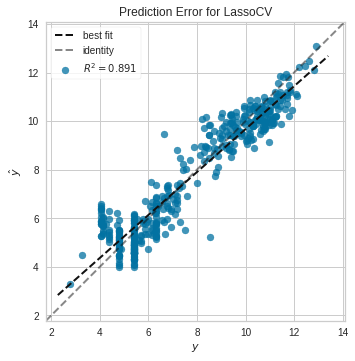

In [ ]:
# Visualize fit for midfielders.
model_m = result_m[0]
X_train, X_test, y_train, y_test = train_test(m)
visualizer = PredictionError(model_m)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

In [ ]:
# Print important features.
print(result_m[1])

['Weight' 'Age' 'CA' 'PA' 'Wor' 'Tea' 'Tck' 'Str' 'Sta' 'TRO' 'Ref' 'Pun'
 'Pen' 'OtB' 'Nat' 'Mar' 'L Th' 'Ldr' 'Kic' 'Jum' 'Hea' 'Fre' 'Fir' 'Fin'
 'Ecc' 'Dri' 'Det' 'Dec' 'Cro' 'Cor' 'Cnt' 'Cmp' 'Com' 'Cmd' 'Bal' 'Aer'
 'Top15club' 'Preferred Foot_Left' 'Preferred Foot_Left Only'
 'Preferred Foot_Right' 'Preferred Foot_Right Only' 'Best Role_AM'
 'Best Role_BBM' 'Best Role_CAR' 'Best Role_CM' 'Best Role_DM'
 'Best Role_MEZ' 'Best Role_SS']


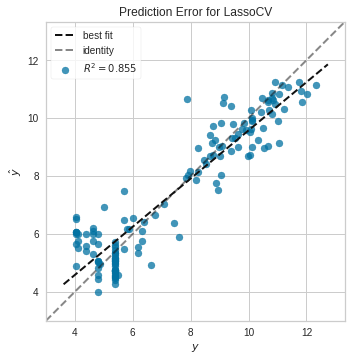

In [ ]:
# Visualize fit for strikers.
model_st = result_st[0]
X_train, X_test, y_train, y_test = train_test(st)
visualizer = PredictionError(model_st)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

In [ ]:
# Print important features.
print(result_st[1])

['Age' 'CA' 'TRO' 'Pun' 'Pen' 'Pac' '1v1' 'OtB' 'L Th' 'Lon' 'Jum' 'Fir'
 'Det' 'Cor' 'Cmp' 'Com' 'Bra' 'Agi' 'Agg' 'Aer' 'Acc' 'Top15club'
 'Preferred Foot_Left' 'Preferred Foot_Right' 'Best Role_AF'
 'Best Role_DLF' 'Best Role_PF' 'Best Role_TM']


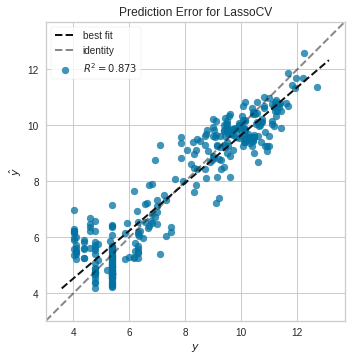

In [ ]:
# Visualize fit for Defenders.
model_d = result_d[0]
X_train, X_test, y_train, y_test = train_test(d)
visualizer = PredictionError(model_d)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

In [ ]:
# Print important features.
print(result_d[1])

['Age' 'CA' 'PA' 'Vis' 'Tec' 'Tck' 'Sta' 'TRO' 'Ref' 'Pac' 'Nat' 'L Th'
 'Lon' 'Kic' 'Fla' 'Cnt' 'Com' 'Bal' 'Agg' 'Top15club'
 'Preferred Foot_Right Only' 'Best Role_BPD' 'Best Role_NFB']


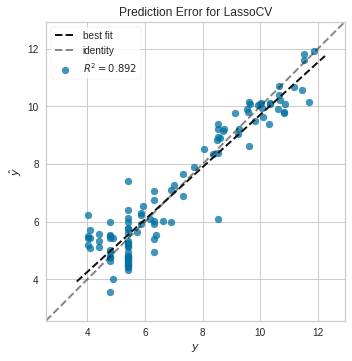

In [ ]:
# Visualize fit for Defenders.
model_gk = result_gk[0]
X_train, X_test, y_train, y_test = train_test(GK)
visualizer = PredictionError(model_gk)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

In [ ]:
# Print important features.
print(result_gk[1])

['Height' 'Age' 'CA' 'PA' 'Sta' 'Ref' 'Pen' 'L Th' 'Kic' 'Hea' 'Ecc' 'Cmp'
 'Agi' 'Acc' 'Top15club' 'Preferred Foot_Right']
